## Chapter 14: exercise 9 create CNN from scratch

In [4]:
import numpy as np
import pandas as pd
import os
import sklearn
import tensorflow as tf
from tensorflow import keras

In [5]:
# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

In [6]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

X_mean = X_train.mean(axis=0, keepdims=True)
X_std = X_train.std(axis=0, keepdims=True) + 1e-7
X_train = (X_train - X_mean) / X_std
X_valid = (X_valid - X_mean) / X_std
X_test = (X_test - X_mean) / X_std

X_train = X_train[..., np.newaxis]
X_valid = X_valid[..., np.newaxis]
X_test = X_test[..., np.newaxis]

4423680/4422102 [==============================] - 0s 0us/step


In [7]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [8]:
from functools import partial

LeNetConv2D = partial(keras.layers.Conv2D,
                      kernel_size=5, activation='tanh', 
                      strides=1, padding="SAME")

model = keras.models.Sequential([
    keras.layers.ZeroPadding2D(padding=((1,1),(1,1))),
    LeNetConv2D(filters=6, input_shape=[32, 32, 1]),
    keras.layers.AvgPool2D(pool_size=6, strides=2, padding='same'),
    LeNetConv2D(filters=16),
    keras.layers.AvgPool2D(pool_size=16, strides=2, padding='same'),
    LeNetConv2D(filters=120),
    keras.layers.Flatten(),
    keras.layers.Dense(units=84, activation='tanh'),
    keras.layers.Dense(units=10, activation='softmax')
])

In [9]:
model.compile(loss="sparse_categorical_crossentropy", optimizer="nadam", metrics=["accuracy"])
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid))

Epoch 1/10
1719/1719 [==============================] - 44s 8ms/step - loss: 0.6546 - accuracy: 0.7576 - val_loss: 0.5349 - val_accuracy: 0.8024
Epoch 2/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4889 - accuracy: 0.8224 - val_loss: 0.4670 - val_accuracy: 0.8224
Epoch 3/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4367 - accuracy: 0.8411 - val_loss: 0.4162 - val_accuracy: 0.8478
Epoch 4/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.4041 - accuracy: 0.8527 - val_loss: 0.3987 - val_accuracy: 0.8564
Epoch 5/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3836 - accuracy: 0.8608 - val_loss: 0.3815 - val_accuracy: 0.8606
Epoch 6/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3735 - accuracy: 0.8638 - val_loss: 0.3939 - val_accuracy: 0.8584
Epoch 7/10
1719/1719 [==============================] - 13s 8ms/step - loss: 0.3643 - accuracy: 0.8677 - val_loss: 0.3722 - val_ac

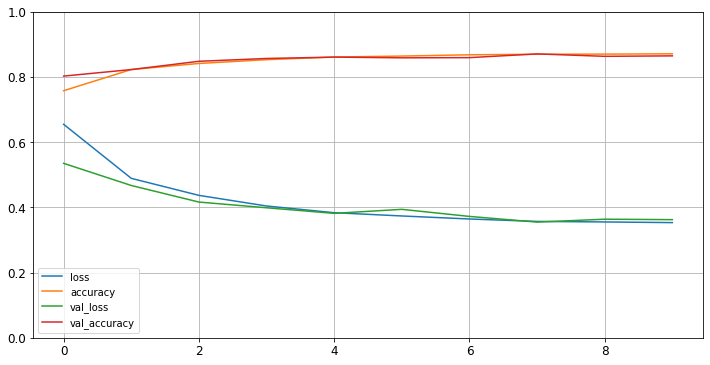

In [10]:
pd.DataFrame(history.history).plot(figsize = (12,6))
plt.grid(True)
plt.gca().set_ylim(0,1)
plt.show()